# Homework 1

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

## Problem 3
the position of the object in a specific time is given by

$$
s(t) = \frac{g}{2\omega} \left[sinh(\omega t) - sin(\omega t)\right]
$$

and we know at $t=1$ second the object has moved by a distant of 1 m so we procede by finding an approximate value of w

$$
1 = \frac{g}{2\omega} \left[sinh(\omega) - sin(\omega)\right] \\ \\
\frac{2}{g} = \frac{1}{\omega} \left[sinh(\omega) - sin(\omega)\right] \\ \\
0 = \frac{1}{\omega} \left[sinh(\omega) - sin(\omega)\right] - \frac{2}{g}
$$


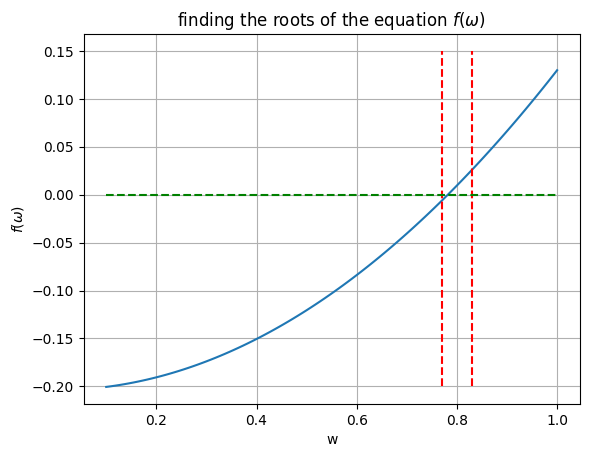

In [27]:
# constants
g = 9.81
accuracy = 1e-8

f = lambda w: (np.sinh(w)-np.sin(w))/w - 2/g

# plotting the equation
w = np.linspace(0.1, 1, 100)
plt.plot(w, f(w))
plt.xlabel('w')
plt.ylabel('$f(\omega)$')
plt.title('finding the roots of the equation $f(\omega)$')
plt.vlines(0.77, -0.20, 0.15, colors='r', linestyles='--')
plt.vlines(0.83, -0.20, 0.15, colors='r', linestyles='--')
plt.hlines(0, 0.1, 1, colors='green', linestyles='--')
plt.grid()
plt.show()

From the plot we can see that the value of f($\omega$) closest to 0 is between $0.77 < \omega < 0.83$.
To find the best value of $\omega$ we procede with Newton-Raphson methods 

In [28]:
# calculating the derivative of the function

df = lambda w: -(np.sinh(w)-np.sin(w))/(w**2.) + (np.cosh(w)-np.cos(w))/w

# Newton-Raphson method
def Newton_Raphson(f, df, x, tol):
    while abs(f(x)) > tol:
        x = x - f(x)/df(x)
    return x

# finding the roots

w0 = 0.78 # initial guess

f1 = f(w0)
df1 = df(w0)
best_w = Newton_Raphson(f, df, w0, accuracy)

print('The best value of w is:', best_w)

The best value of w is: 0.7818879525955137


In [29]:
# comparison with scipy

sol = root_scalar(f, bracket=[0.77, 0.83], method='bisect', xtol=accuracy)

print(f'The best value of w using scipy: {sol.root:.8f}')

The best value of w using scipy: 0.78188796
